In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
volume_file_name = 'Data/volume_data.pkl'
one_way_volume_df = pd.read_pickle(volume_file_name)

In [4]:
pd.set_option('display.max_columns', None)
one_way_volume_df

,station_id,dir_of_travel,datetime,lane_x,lane_1,lane_2,lane_3,lane_4,total
0,8,1,2012-07-02 00:00:00,0,0,0,0,0,0
1,8,1,2012-07-02 01:00:00,0,0,0,0,0,0
2,8,1,2012-07-02 02:00:00,0,0,0,0,0,0
3,8,1,2012-07-02 03:00:00,2,0,0,0,0,2
4,8,1,2012-07-02 04:00:00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
25576843,6224,7,2021-02-27 19:00:00,0,235,7,0,0,242
25576844,6224,7,2021-02-27 20:00:00,0,224,6,0,0,230
25576845,6224,7,2021-02-27 21:00:00,0,165,3,0,0,168
25576846,6224,7,2021-02-27 22:00:00,0,130,1,0,0,131


In [5]:
one_way_volume_df.drop(['lane_x', 'lane_1', 'lane_2', 'lane_3', 'lane_4'], axis=1, inplace=True)
one_way_volume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25576848 entries, 0 to 25576847
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   station_id     category      
 1   dir_of_travel  category      
 2   datetime       datetime64[ns]
 3   total          int16         
dtypes: category(2), datetime64[ns](1), int16(1)
memory usage: 292.7 MB


In [6]:
two_way_volume_df = one_way_volume_df.groupby(['station_id', 'datetime'], as_index=False, sort=False, observed=True).sum()
two_way_volume_df

,station_id,datetime,total
0,8,2012-07-02 00:00:00,4
1,8,2012-07-02 01:00:00,0
2,8,2012-07-02 02:00:00,0
3,8,2012-07-02 03:00:00,6
4,8,2012-07-02 04:00:00,0
...,...,...,...
12791851,6224,2021-02-27 19:00:00,505
12791852,6224,2021-02-27 20:00:00,480
12791853,6224,2021-02-27 21:00:00,358
12791854,6224,2021-02-27 22:00:00,231


In [7]:
current_stations_file = 'Data/Current_CC_StationList.xlsx'
current_df = pd.read_excel(current_stations_file)
current_stations = current_df['Continuous Number'].values

In [8]:
current_df

,Continuous Number,Sequence Number,Collection Type,Route,Pos Dir Dir,Pos Lanes,Neg Lanes,Urban/Rural,Functional Class,County Name,Location Text
0,26,5707,WIM,I-35,North,2,2,Rural,Interstate,Steele,"3.5 MI N OF TH30, N OF ELLENDALE"
1,27,9830,WIM,TH 60,East,2,2,Rural,Principal Arterial - Other,Watonwan,"0.7 MI W OF W JCT OF TH4, SW OF ST JAMES"
2,28,22993,"ATR Volume, Speed, Class",MSAS 114,East,1,1,Urban,Minor Arterial,Stearns,W OF 20TH AVE N IN ST CLOUD
3,29,69377,WIM,TH 53,North,2,2,Rural,Principal Arterial - Other,Saint Louis,"3 MI S OF CSAH59 (MELRUDE RD), S OF EVELETH"
4,30,6757,WIM,TH 61,North,2,2,Rural,Principal Arterial - Other,Lake,"SW OF CSAH25, SW OF TWO HARBORS"
...,...,...,...,...,...,...,...,...,...,...,...
99,4820,4820,"ATR Volume, Speed, Length",I-90,East,2,2,Rural,Interstate,Rock,"W OF CSAH 4, W OF BEAVER CREEK"
100,4910,4910,"ATR Volume, Speed, Length",TH 53,North,2,2,Rural,Principal Arterial - Other,Saint Louis,"N OF CSAH8 (DULUTH SAINT VINCENT RD), NW OF HE..."
101,5984,5984,"ATR Volume, Speed, Length",TH 61,North,2,2,Rural,Principal Arterial - Other,Wabasha,".9 MI SE OF CSAH18, S OF KELLOGG"
102,6067,6067,"ATR Volume, Speed, Length",TH 10,East,2,2,Rural,Principal Arterial - Other,Wadena,".3 MI E OF 141ST AVE, W OF VERNDALE"


In [9]:
current_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Continuous Number  104 non-null    int64 
 1   Sequence Number    104 non-null    int64 
 2   Collection Type    104 non-null    object
 3   Route              104 non-null    object
 4   Pos Dir Dir        104 non-null    object
 5   Pos Lanes          104 non-null    int64 
 6   Neg Lanes          104 non-null    int64 
 7   Urban/Rural        104 non-null    object
 8   Functional Class   104 non-null    object
 9   County Name        104 non-null    object
 10  Location Text      104 non-null    object
dtypes: int64(4), object(7)
memory usage: 9.1+ KB


In [10]:
active_stations = two_way_volume_df.station_id.isin(current_stations)
two_way_volume_df = two_way_volume_df[active_stations]
two_way_volume_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11267376 entries, 135888 to 12791855
Data columns (total 3 columns):
 #   Column      Dtype         
---  ------      -----         
 0   station_id  category      
 1   datetime    datetime64[ns]
 2   total       int16         
dtypes: category(1), datetime64[ns](1), int16(1)
memory usage: 204.2 MB


In [11]:
two_way_volume_df.reset_index(drop=True, inplace=True)
two_way_volume_df

,station_id,datetime,total
0,26,2007-01-01 00:00:00,92
1,26,2007-01-01 01:00:00,69
2,26,2007-01-01 02:00:00,70
3,26,2007-01-01 03:00:00,55
4,26,2007-01-01 04:00:00,93
...,...,...,...
11267371,6224,2021-02-27 19:00:00,505
11267372,6224,2021-02-27 20:00:00,480
11267373,6224,2021-02-27 21:00:00,358
11267374,6224,2021-02-27 22:00:00,231


In [12]:
two_way_volume_df = two_way_volume_df.pivot(index='datetime', columns='station_id', values='total')
two_way_volume_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167904 entries, 2002-01-01 00:00:00 to 2021-02-28 23:00:00
Columns: 101 entries, 26 to 6224
dtypes: float64(101)
memory usage: 130.7 MB


In [13]:
two_way_volume_df

station_id,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,51,103,110,164,175,179,187,191,198,199,200,204,208,209,210,211,212,214,218,219,220,221,222,223,225,227,228,229,230,231,232,233,301,303,305,309,315,321,326,329,335,336,341,342,351,352,353,354,365,381,382,384,386,388,389,390,400,402,405,407,410,420,425,458,460,464,495,949,1335,1604,1940,3467,3790,3801,4820,4910,5984,6224
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-01 00:00:00,NaN,NaN,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,822.0,116.0,66.0,120.0,35.0,152.0,405.0,32.0,36.0,287.0,177.0,261.0,8.0,12.0,22.0,306.0,3.0,5.0,36.0,17.0,63.0,11.0,73.0,32.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,4144.0,2869.0,1489.0,2554.0,1824.0,2798.0,3251.0,2351.0,486.0,1405.0,1056.0,NaN,136.0,495.0,198.0,813.0,397.0,73.0,190.0,410.0,86.0,231.0,646.0,170.0,2.0,126.0,1874.0,358.0,73.0,541.0,507.0,129.0,128.0,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-01 01:00:00,NaN,NaN,157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,877.0,58.0,68.0,157.0,46.0,157.0,568.0,23.0,18.0,305.0,173.0,258.0,14.0,16.0,18.0,332.0,10.0,9.0,28.0,17.0,52.0,10.0,61.0,31.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,4761.0,3165.0,1453.0,3173.0,2230.0,3157.0,4074.0,2947.0,545.0,1549.0,1292.0,NaN,178.0,526.0,210.0,912.0,367.0,112.0,283.0,411.0,111.0,259.0,654.0,168.0,2.0,121.0,2322.0,378.0,56.0,523.0,440.0,111.0,105.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-01 02:00:00,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,472.0,49.0,57.0,83.0,19.0,92.0,395.0,20.0,17.0,242.0,131.0,179.0,1.0,16.0,19.0,130.0,0.0,7.0,16.0,8.0,30.0,3.0,34.0,13.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,2849.0,1773.0,773.0,2207.0,1362.0,1773.0,2385.0,1852.0,332.0,865.0,704.0,NaN,110.0,290.0,141.0,517.0,218.0,67.0,164.0,205.0,58.0,148.0,419.0,72.0,1.0,58.0,1444.0,212.0,35.0,326.0,235.0,77.0,68.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-01 03:00:00,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,353.0,48.0,39.0,81.0,10.0,61.0,255.0,14.0,2.0,160.0,73.0,135.0,2.0,5.0,12.0,90.0,3.0,11.0,11.0,8.0,31.0,2.0,28.0,9.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,1736.0,1069.0,461.0,1320.0,825.0,1069.0,1255.0,1146.0,206.0,509.0,405.0,NaN,38.0,173.0,85.0,310.0,173.0,32.0,94.0,134.0,25.0,88.0,240.0,49.0,3.0,41.0,870.0,131.0,12.0,213.0,122.0,29.0,40.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-01 04:00:00,NaN,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,296.0,59.0,28.0,75.0,13.0,43.0,168.0,4.0,2.0,142.0,74.0,101.0,1.0,2.0,8.0,82.0,0.0,3.0,5.0,1.0,17.0,2.0,30.0,9.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,1121.0,785.0,324.0,916.0,579.0,908.0,822.0,734.0,133.0,319.0,209.0,NaN,29.0,122.0,85.0,219.0,216.0,31.0,93.0,77.0,18.0,72.0,182.0,25.0,4.0,38.0,583.0,60.0,18.0,120.0,63.0,21.0,29.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28 19:00:00,712.0,NaN,NaN,NaN,NaN,162.0,1234.0,129.0,NaN,NaN,NaN,858.0,219.0,NaN,NaN,1415.0,584.0,23.0,396.0,NaN,NaN,NaN,NaN,NaN,NaN,723.0,NaN,NaN,195.0,719.0,NaN,74.0,34.0,NaN,309.0,NaN,21.0,29.0,NaN,389.0,8.0,27.0,NaN,61.0,NaN,61.0,NaN,75.0,262.0,26.0,31.0,80.0,10.0,NaN,48.0,3598.0,3953.0,2383.0,NaN,NaN,NaN,NaN,NaN,NaN,2205.0,NaN,NaN,NaN,NaN,NaN,NaN,1126.0,NaN,2254.0,976.0,164.0,541.0,876.0,193.0,NaN,NaN,2550.0,NaN,81.0,1032.0,566.0,292.0,119.0,365.0,807.0,1542.0,471.0,NaN,138.0,NaN,935.0,7

There are a handful of days which are totally missing from the data. We'll set the frequency of the data to hourly to force these indices to populate (with null values).

In [14]:
two_way_volume_df = two_way_volume_df.asfreq('H')

In [15]:
two_way_volume_df.describe()

station_id,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,51,103,110,164,175,179,187,191,198,199,200,204,208,209,210,211,212,214,218,219,220,221,222,223,225,227,228,229,230,231,232,233,301,303,305,309,315,321,326,329,335,336,341,342,351,352,353,354,365,381,382,384,386,388,389,390,400,402,405,407,410,420,425,458,460,464,495,949,1335,1604,1940,3467,3790,3801,4820,4910,5984,6224
count,104520.000000,36648.000000,149016.000000,91176.000000,20088.000000,77520.000000,61128.000000,97056.000000,95736.000000,104568.000000,4320.000000,87360.000000,87840.000000,70128.000000,66792.000000,70752.000000,68328.000000,51240.000000,53472.000000,37680.000000,5712.000000,24456.000000,24336.000000,152640.000000,127584.000000,148152.000000,165528.000000,150504.000000,151608.000000,160464.000000,156432.000000,166128.000000,164016.000000,140904.000000,154584.000000,147792.000000,166248.000000,165792.000000,147408.000000,166512.000000,155328.000000,147408.000000,153600.000000,165912.000000,149016.000000,164376.000000,115536.000000,163248.000000,149016.000000,76032.000000,75672.000000,73968.000000,74544.000000,71208.000000,65424.000000,148944.000000,148848.000000,149760.000000,148416.000000,148416.000000,148416.000000,148416.000000,148416.000000,147552.000000,149616.000000,150384.000000,130896.000000,160056.000000,162048.000000,152808.000000,138768.000000,165360.000000,97944.000000,156168.000000,167256.000000,163752.000000,162480.000000,149784.000000,167016.000000,136728.000000,143952.000000,149784.000000,144288.000000,167520.000000,166800.000000,162216.000000,167784.000000,167424.000000,159936.000000,18048.000000,16032.000000,10680.000000,10944.000000,18216.000000,8736.000000,7752.000000,12504.000000,15864.000000,15864.000000,16080.000000,16248.000000
mean,823.911232,241.110702,381.588085,333.606278,338.690114,221.716164,1174.177496,203.219245,127.452735,232.416179,1250.282639,1235.480552,429.716314,2260.163758,18.738621,1293.280755,673.373932,39.733236,513.389194,17.003105,777.965511,15.519096,433.561391,20.231473,1875.224801,1060.105061,378.653756,933.931802,91.538118,866.575288,1797.113794,109.686001,60.910405,1753.402338,427.829523,1272.211426,25.919295,47.583116,155.139640,900.340564,16.618066,35.730415,144.886172,80.979531,124.687282,71.701812,179.366977,117.147003,383.140529,31.251289,44.392444,103.098137,12.693510,14.467167,55.091174,6563.187587,5552.757786,4215.634495,3802.802063,4583.960894,6619.515409,5563.775018,3788.897875,1832.631784,3269.762532,2849.902643,4751.685231,580.102189,1434.571121,922.475643,3454.225837,1641.238661,448.706005,1191.248053,1271.019204,275.205628,800.074095,1783.754587,416.289733,77.326963,845.647445,3716.793863,751.435636,124.896054,1194.162836,935.845410,367.780146,230.926235,840.977666,912.176031,1172.179516,303.415356,334.972588,161.825209,381.082761,781.865841,591.790147,468.458081,262.303328,161.137811,482.407742
std,559.375188,173.731342,297.114162,257.386606,278.292391,162.298123,798.815427,147.640079,94.548808,168.918950,864.506523,898.620162,303.422281,1496.455941,17.920011,843.115232,505.498468,33.924150,377.628136,13.115321,687.808357,12.811987,312.886913,25.444168,1254.541245,844.319479,279.572572,675.917013,72.547895,669.144061,1210.053280,77.363442,45.917000,1142.668035,371.709436,819.336828,19.068106,35.324599,126.290995,679.794849,15.833076,28.483303,111.042497,71.996655,98.045274,82.863566,139.532882,90.078375,268.480025,26.660739,33.100503,76.261917,12.524174,13.566869,42.402450,3905.075709,3274.972490,2718.341657,2078.486155,2888.281694,3809.000746,3424.272999,2178.196086,1208.748019,2254.041004,1934.767326,2920.360088,401.532110,937.874072,602.250096,2213.196849,1039.967723,307.891991,799.976531,879.640645,194.501457,525.719478,1299.418985,319.044177,59.649373,709.174416,2396.984896,528.498666,92.614637,816.591108,645.254447,270.291585,173.447540,701.674081,658.026981,872.551437,213.149328,226.234683,121.744500,262.970807,570.748119,410.387708,338.220927,204.005255,129.19

In [16]:
two_way_volume_df.columns = two_way_volume_df.columns.astype('str')

In [17]:
two_way_volume_file_name = 'Data/two_way_volume_data.pkl'
two_way_volume_df.to_pickle(two_way_volume_file_name)

Testing for Stationarity

In [18]:
# https://davegiles.blogspot.com/2012/04/unit-root-tests-with-missing.html
#df = two_way_volume_df['26'].dropna()

In [19]:
# adf = adfuller(df, maxlag=200, regression='ct')

In [20]:
# adf

In [21]:
# print('ADF Statistic: %f' % adf[0])
# print('p-value: %f' % adf[1])
# print('Critical Values:')
# for key, value in adf[4].items():
#     print('\t%s: %.3f' % (key, value))

In [22]:
def test_train_split_series(ts, test_size = 0.2):
    '''
    Splits a time series into train and test series, where null values are ignored for the purposes of determining the 
    split point but retained in the split data.
    
    ts is a column from a Pandas data frame
    test_ratio is a float representing the proportion of non-null data that will be in the test series. It should
    fall between 0 and 1 inclusive.
    
    Returns two time series train and test
    '''
    # Get count of non-null entries that should be in the training series.
    non_null_count = ts.notna().sum()
    train_length = int(non_null_count * (1 - test_size))
    
    # Split the series so that there are train_length non-null entries in the training series and all other
    # non-null entries are in the test series.
    cs = ts.notna().cumsum()
    # Since train_length should be less than non_null_count, train_length should appear in at least one location in cs
    # take the first appearance, which should correspond to a non-null entry.
    its = cs[cs==train_length].index[0]
    
    # ts should be a time series, so slicing up to its should be inclusive.
    train = ts[:its]
    # On the other hand, the index will be duplicated, so throw out the first entry for the test series.
    test = ts[its:][1:]
    
    return train, test

Auto ARIMA methods don't work because of the null values. Since ARIMA methods are still valid with missing entries, we
take over the task of fitting the ARIMA models ourselves.

In [23]:
df = two_way_volume_df['26']

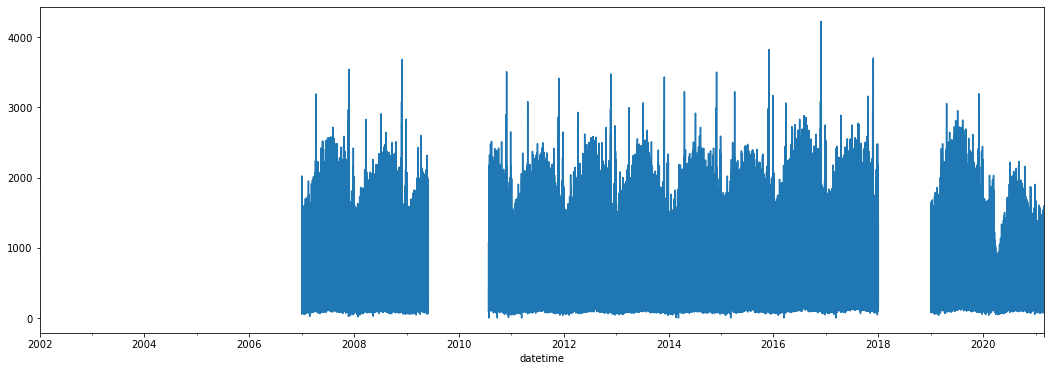

In [50]:
df.plot(figsize=(18,6));

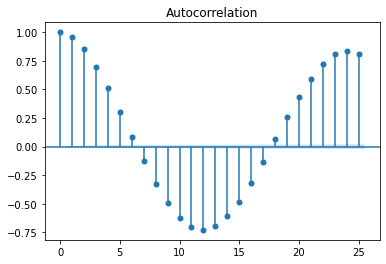

In [60]:
plot_acf(df, lags=25, missing='conservative', alpha=.05, fft=True);

In [44]:
diff_df = df.diff()

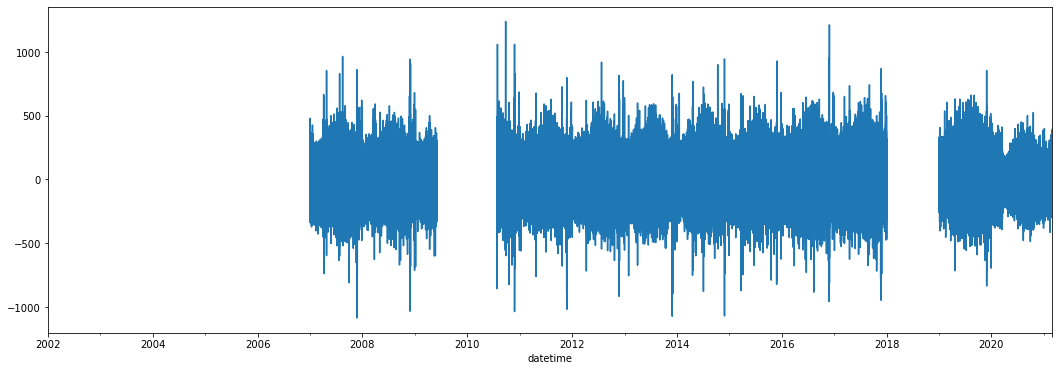

In [51]:
diff_df.plot(figsize=(18,6));

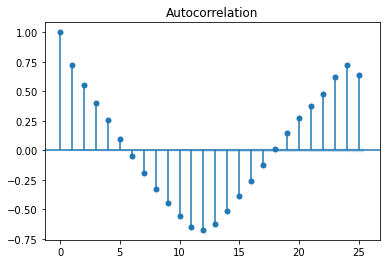

In [61]:
plot_acf(diff_df, lags=25, missing='conservative', alpha=.05, fft=True);

In [46]:
seasonal_diff_df = diff_df.diff(24)

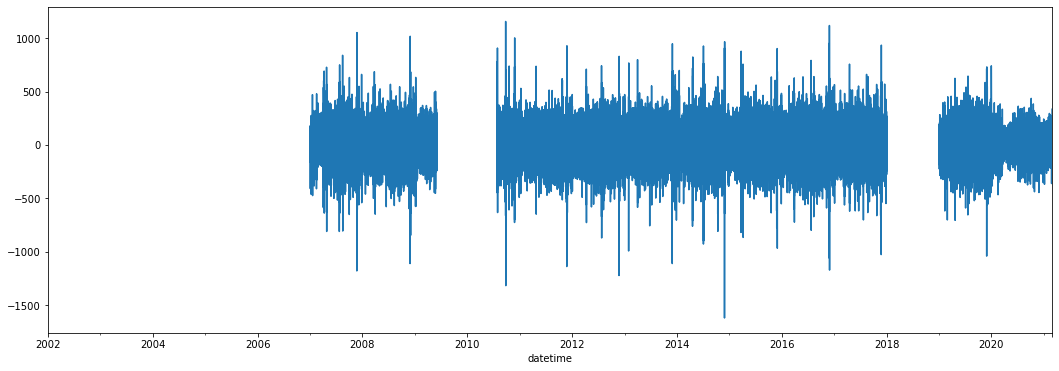

In [52]:
seasonal_diff_df.plot(figsize=(18,6));

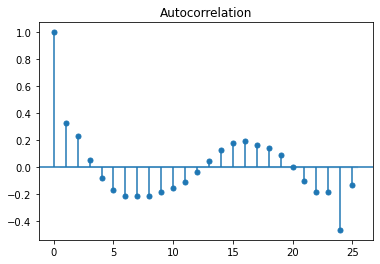

In [62]:
plot_acf(seasonal_diff_df, lags=25, missing='conservative', alpha=.05, fft=True);

In [63]:
def ts_evaluate_model(ts_train, order, seasonal_order, test_size=0.2, maxiter=50):
    '''
    Trains a seasonal ARIMA model on the time series y and evaluates it using the metric. The metric must be a function taking \
    two time-series as arguments.
    '''
    
    # fit model to training data
    model = sm.tsa.statespace.SARIMAX(ts_train, order=order, seasonal_order=seasonal_order, 
                                      enforce_stationarity=False,enforce_invertibility=False,
                                     simple_differencing=True)
    results = model.fit(maxiter=maxiter, disp=False)

    return results.bic

In [64]:
# Make a function to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_arima_search(ts, order_list, seasonal_order_list, test_size=0.2, maxiter=50):
    '''
    Finds the best-fitting ARIMA using the given metric.
    '''
    ts_train, ts_test = test_train_split_series(ts, test_size)
    
    min_score = None
    min_order = None
    min_seasonal_order = None
    
    for order in order_list:
        for seasonal_order in seasonal_order_list:
            try:
                score = ts_evaluate_model(ts_train, order, seasonal_order, test_size=test_size, maxiter=maxiter)
                print(f"Score for (p, d, q) = {order}, (P, D, Q, m) = {seasonal_order}: {score:0.3f}")
                if (min_score is None) or (score < min_score):
                    print(f"New best score!")
                    min_score = score
                    min_order = order
                    min_seasonal_order = seasonal_order
            except:
                continue
                
    return min_order, min_seasonal_order

In [55]:
def full_grid_search(ts, p_list, d_list, q_list, P_list, D_list, Q_list, m=24, test_size=0.2, maxiter=50):
    order_list = list(itertools.product(p_list, d_list, q_list))
    seasonal_order_list = list(itertools.product(p_list, d_list, q_list, [m]))
    
    return evaluate_arima_search(ts, order_list, seasonal_order_list, test_size, maxiter)

In [66]:
pqPQ_list = range(0,2)
dD_list = [1]
p_list, d_list, q_list, P_list, D_list, Q_list \
    = pqPQ_list, dD_list, pqPQ_list, pqPQ_list, dD_list, pqPQ_list

In [67]:
best_order, best_seasonal_order = full_grid_search(two_way_volume_df['26'], p_list, d_list, q_list, P_list, D_list, Q_list)

Score for (p, d, q) = (0, 1, 0), (P, D, Q, m) = (0, 1, 0, 24): 1041857.623
New best score!
Score for (p, d, q) = (0, 1, 0), (P, D, Q, m) = (0, 1, 1, 24): 992353.776
New best score!


C:\Users\wodar\anaconda3\envs\gis\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Score for (p, d, q) = (0, 1, 0), (P, D, Q, m) = (1, 1, 0, 24): 1021128.912
Score for (p, d, q) = (0, 1, 0), (P, D, Q, m) = (1, 1, 1, 24): 992060.352
New best score!
Score for (p, d, q) = (0, 1, 1), (P, D, Q, m) = (0, 1, 0, 24): 1034577.065
Score for (p, d, q) = (0, 1, 1), (P, D, Q, m) = (0, 1, 1, 24): 984577.437
New best score!
Score for (p, d, q) = (0, 1, 1), (P, D, Q, m) = (1, 1, 0, 24): 1013812.428
Score for (p, d, q) = (0, 1, 1), (P, D, Q, m) = (1, 1, 1, 24): 984312.445
New best score!
Score for (p, d, q) = (1, 1, 0), (P, D, Q, m) = (0, 1, 0, 24): 1031843.310
Score for (p, d, q) = (1, 1, 0), (P, D, Q, m) = (0, 1, 1, 24): 982154.641
New best score!
Score for (p, d, q) = (1, 1, 0), (P, D, Q, m) = (1, 1, 0, 24): 1011564.060
Score for (p, d, q) = (1, 1, 0), (P, D, Q, m) = (1, 1, 1, 24): 981840.236
New best score!
Score for (p, d, q) = (1, 1, 1), (P, D, Q, m) = (0, 1, 0, 24): 1030886.374
Score for (p, d, q) = (1, 1, 1), (P, D, Q, m) = (0, 1, 1, 24): 981673.839
New best score!
Score for 

In [34]:
best_order